In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import annotate
import n_3r1i as method
import plot_utils

In [2]:
fname = method.__file__.split('/')[-1][:-3]
fname

'n_3r1i'

In [3]:
import rate
rate.setkey(1)

In [4]:
source = annotate.get_clean()
source.rename(columns={'Question_ja': 'Question'}, inplace=True)

In [6]:
await method.rate(source)

Request 1 of 1222
Request 2 of 1222
Request 3 of 1222
Request 4 of 1222
Request 5 of 1222
Request 6 of 1222
Request 7 of 1222
Request 8 of 1222
Request 9 of 1222
Request 10 of 1222
Request 11 of 1222
Request 12 of 1222
Request 13 of 1222
Request 14 of 1222
Request 15 of 1222
Request 16 of 1222
Request 17 of 1222
Request 18 of 1222
Request 19 of 1222
Request 20 of 1222
Request 21 of 1222
Request 22 of 1222
Request 23 of 1222
Request 24 of 1222
Request 25 of 1222
Request 26 of 1222
Request 27 of 1222
Request 28 of 1222
Request 29 of 1222
Request 30 of 1222
Request 31 of 1222
Request 32 of 1222
Request 33 of 1222
Request 34 of 1222
Request 35 of 1222
Request 36 of 1222
Request 37 of 1222
Request 38 of 1222
Request 39 of 1222
Request 40 of 1222
Request 41 of 1222
Request 42 of 1222
Request 43 of 1222
Request 44 of 1222
Request 45 of 1222
Request 46 of 1222
Request 47 of 1222
Request 48 of 1222
Request 49 of 1222
Request 50 of 1222
Request 51 of 1222
Request 52 of 1222
Request 53 of 1222
Re

In [7]:
source.to_excel(f'elo.{fname}.xlsx')

In [3]:
source = pd.read_excel(f'elo.{fname}.xlsx')

In [4]:
corr = {key: stats.spearmanr(source[[key.capitalize(), key]]) for key in annotate.measures}
corr

{'novelty': SignificanceResult(statistic=0.4901770536135152, pvalue=7.381153219462824e-75),
 'feasibility': SignificanceResult(statistic=0.5523518099583763, pvalue=1.5527824288989893e-98),
 'value': SignificanceResult(statistic=0.23561855298491127, pvalue=7.067937540905585e-17)}

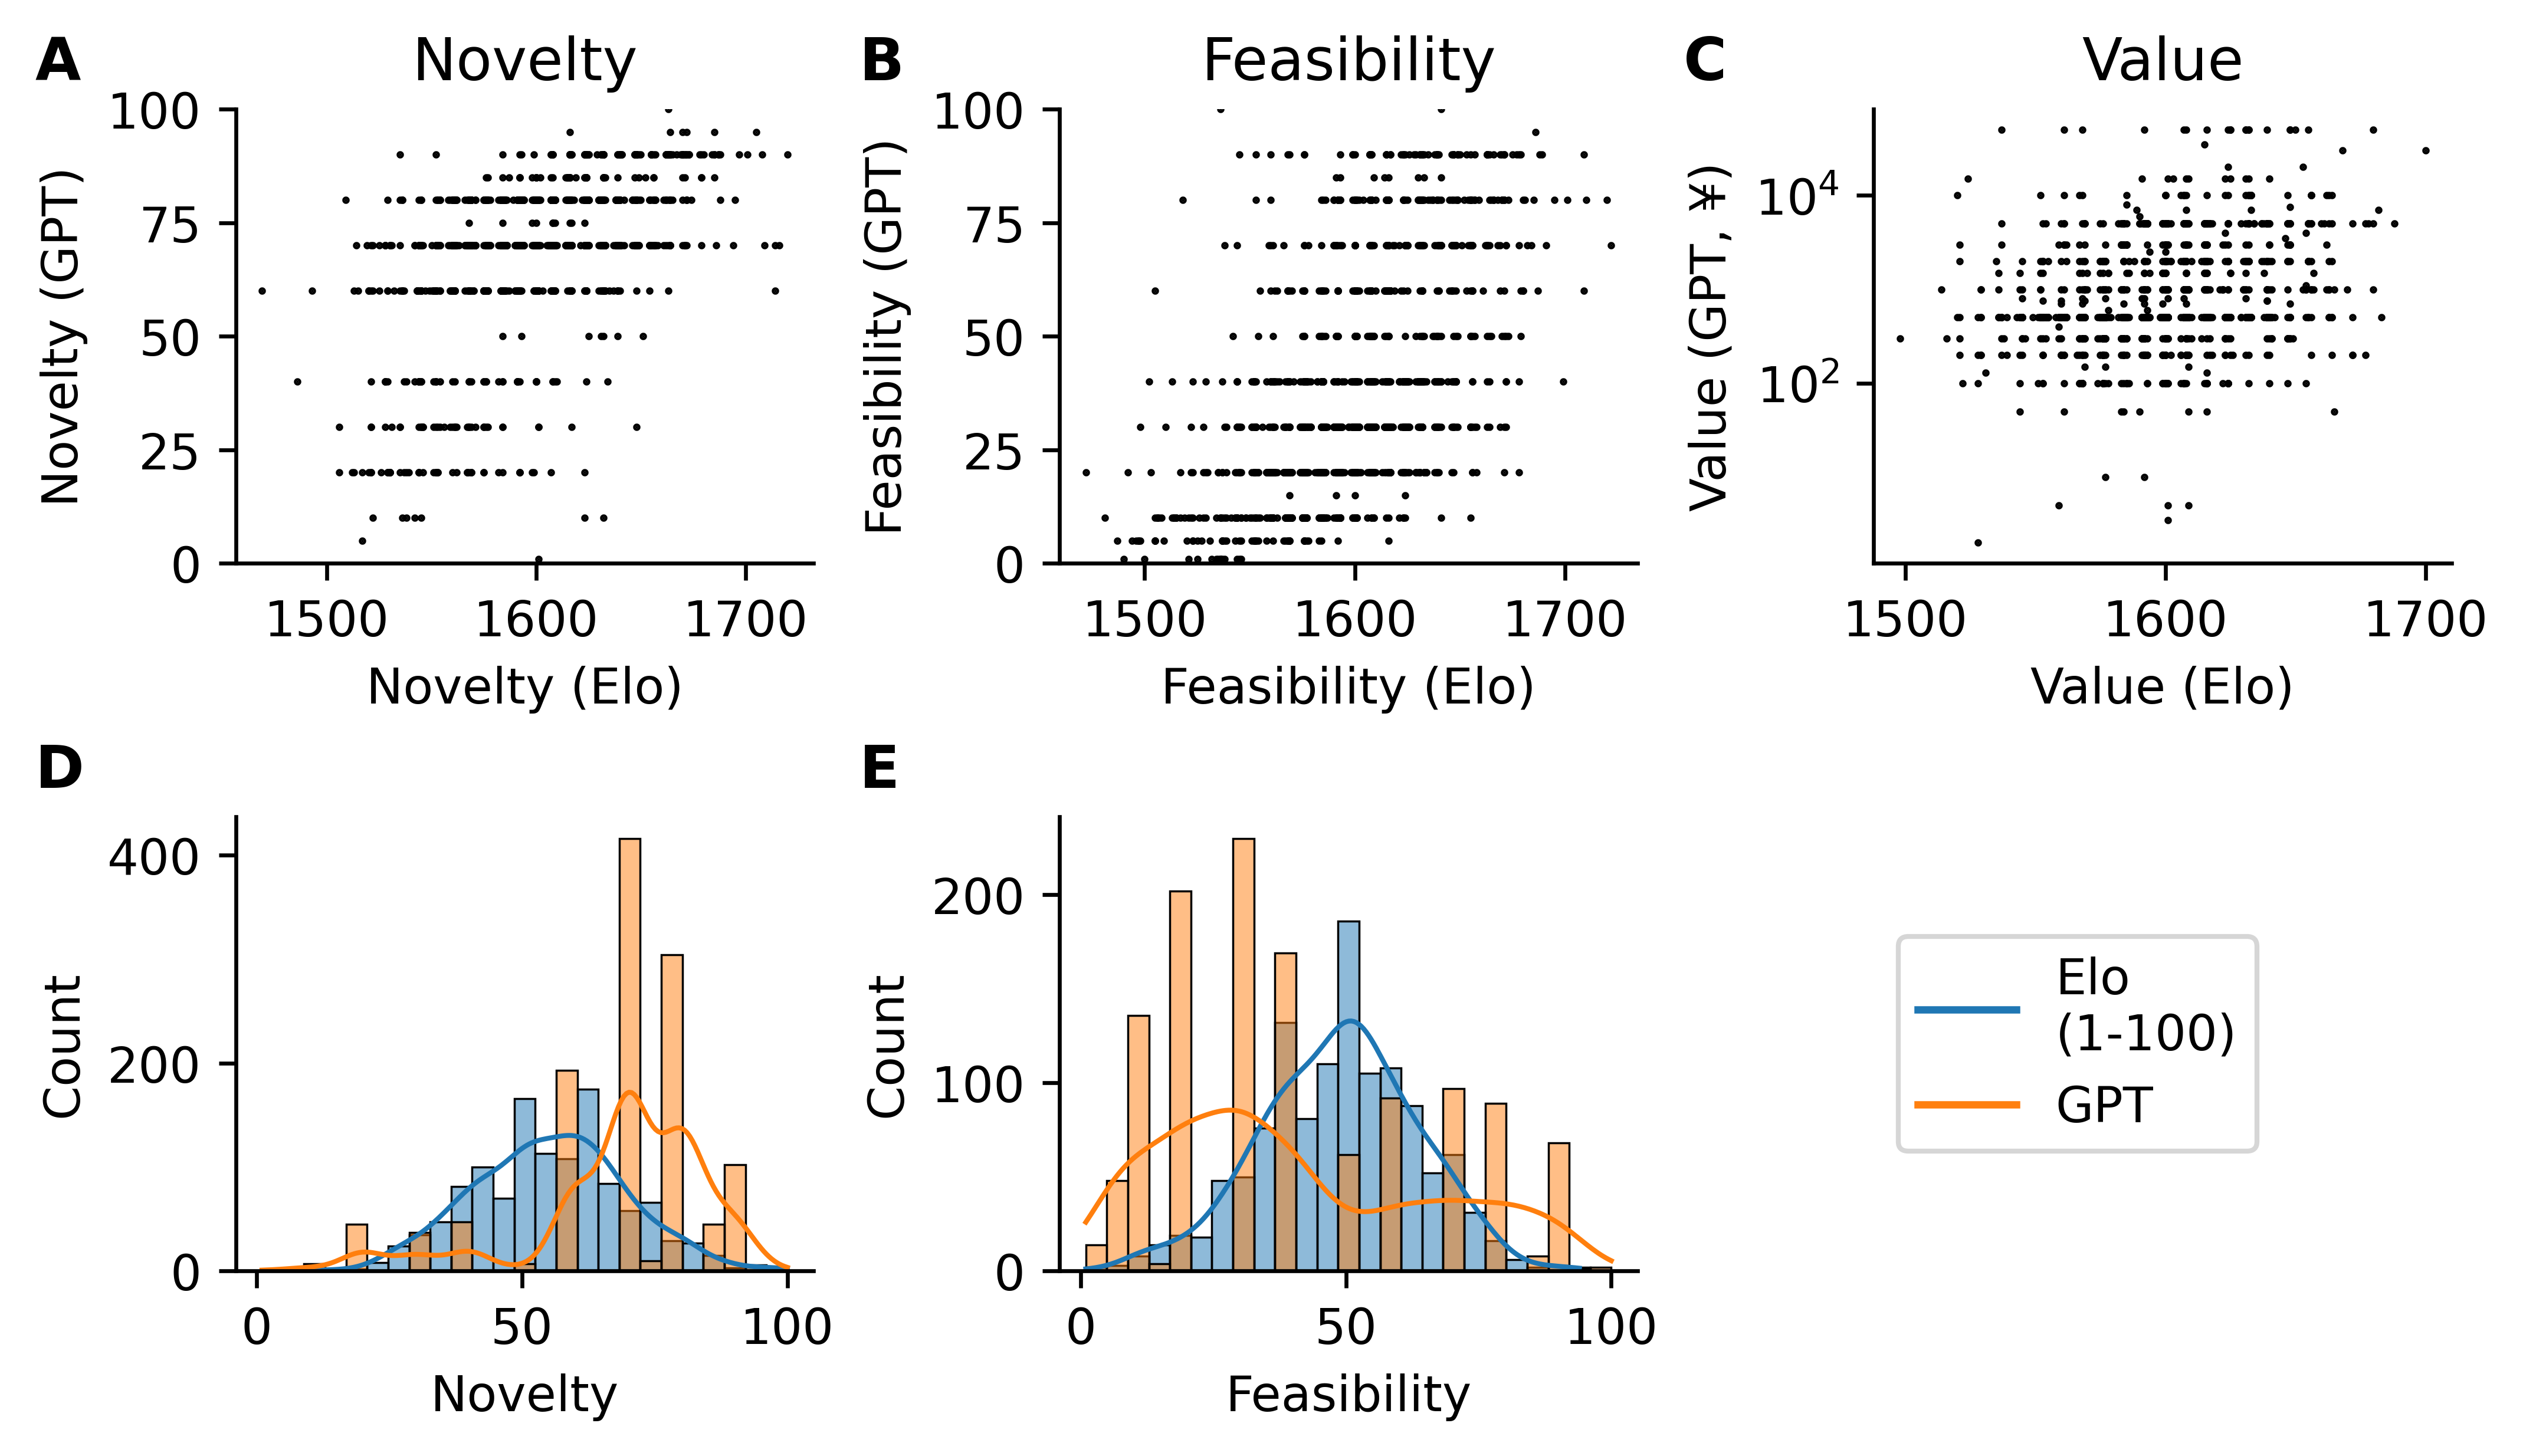

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(7,4), layout='constrained', dpi=600)
for measure, ax in zip(annotate.measures, axs.T):
    Measure = measure.capitalize()
    if measure == 'value':
        mask = (source['value']>0) & (source['value']<100000)
        suffix = ', ¥'
        ax[0].semilogy(source[mask][Measure], source[mask][measure], 'ok', ms=.5)
    else:
        suffix = ''
        ax[0].plot(source[Measure], source[measure], 'ok', ms=.5)
    ax[0].set_xlabel(f'{Measure} (Elo)')
    ax[0].set_ylabel(f'{Measure} (GPT{suffix})')
    ax[0].set_title(Measure)
    if measure != 'value':
        ax[0].set_ylim(0,100)

    if measure != 'value':
        sns.histplot(source, x=f'{measure}_transformed', ax=ax[1], kde=True, bins=25, binrange=(1,100), line_kws={'lw':1})
        sns.histplot(source, x=measure, ax=ax[1], kde=True, bins=25, binrange=(1,100), line_kws={'lw':1})
        ax[1].set_xlabel(Measure)

axs[1,2].plot([], label='Elo\n(1-100)')
axs[1,2].plot([], label='GPT')
axs[1,2].legend(loc='center left')
axs[1,2].set_xticks([])
axs[1,2].set_yticks([])

sns.despine()
sns.despine(ax=axs[1,2], bottom=True, left=True)

for i, ax in enumerate(axs.flatten()):
    if i < 5:
        plot_utils.label_panel(ax, i)

plt.savefig(f'Figure_2.{fname}.pdf')

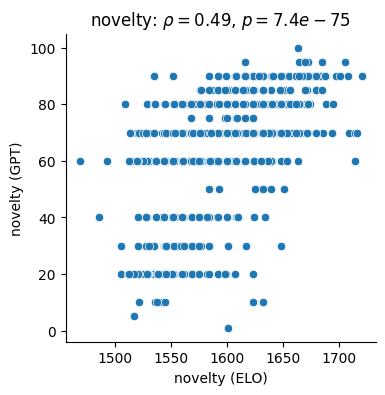

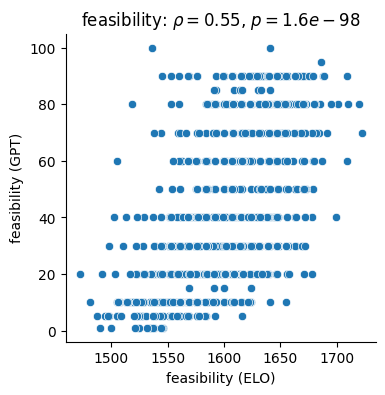

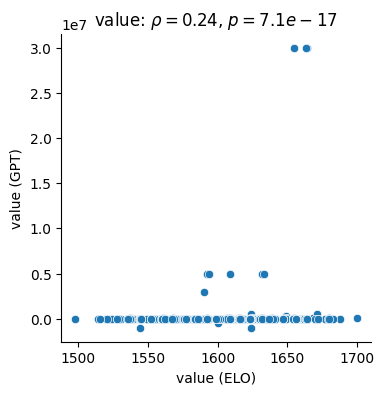

In [6]:
for key, c in corr.items():
    plt.figure(figsize=(4,4))
    sns.scatterplot(source, x=key.capitalize(), y=key)
    sns.despine()
    plt.xlabel(f'{key} (ELO)')
    plt.ylabel(f'{key} (GPT)')
    plt.title(f'{key}: $\\rho = {c.statistic:.2g}$, $p = {c.pvalue:.2g}$')

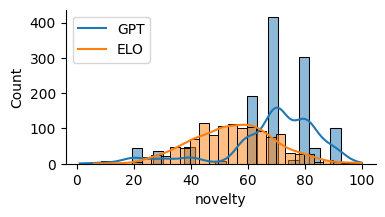

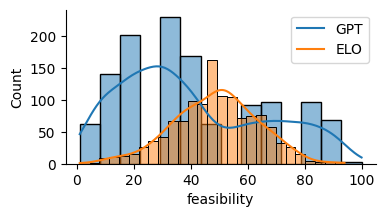

In [8]:
for key in ('novelty', 'feasibility'):
    fig, ax = plt.subplots(figsize=(4,2))
    sns.histplot(source, x=key, ax=ax, kde=True)
    sns.histplot(source, x=f'{key}_transformed', ax=ax, kde=True)
    sns.despine()
    plt.plot([], label='GPT')
    plt.plot([], label='ELO')
    plt.legend()

In [11]:
for idx, row in source[source['value']<0].iterrows():
    print(row['Question'], row['Answer'], row['value_explanation'], sep='\n', end='\n\n')

輪ゴム
食べる
In terms of Value, there are no existing products that serve the same purpose as this idea, as rubber bands are not meant to be eaten. Therefore, it's difficult to estimate a commercial value for this idea. However, considering the potential health risks and legal liabilities associated with selling a product that is harmful if ingested, the value of this idea could be considered negative.

ビー玉
食品
In terms of value, it's difficult to compare this idea to existing products as there are no existing food products that are made of marbles. However, considering the potential health risks and the cost of medical treatment that could result from consuming marbles, the value of this idea could be considered negative.

レンガ
殴る
When considering the value of the idea, we can look at existing products designed for hitting or striking, such as baseball bats or hammers. These range in price from a few hundred to several thousand yen, depending on the quality and brand. However, the idea of us

In [12]:
for idx, row in source[source['value'] > 100000].iterrows():
    print(row['Question'], row['Answer'], row['value'], row['idea_explanation'], row['value_explanation'], sep='\n', end='\n\n')

塩
合成反応
5000000.0
The idea is to use "塩" (salt) in "合成反応" (synthetic reactions). This suggests using common table salt as a catalyst or reactant in chemical synthesis processes.
When considering the value of this idea, it's important to note that the market for chemical synthesis is vast. If salt could be used effectively in synthetic reactions, it could potentially reduce the cost of these reactions, as salt is a cheap and abundant resource. However, the exact value would depend on the specific reactions where salt could be used, and the cost savings compared to other catalysts or reactants.

金属の鍵
造金
120000.0
The idea is to use a metal key ("金属の鍵") as a means of creating gold ("造金").
In terms of value, if it were possible to turn a key into gold, the value would be quite high. The price of gold is currently around 6,000 yen per gram. If a typical key weighs around 20 grams, and if it could be entirely converted into gold, it would be worth around 120,000 yen. However, this is purely hy

Text(0.5, 1.0, 'value: $\\rho = 0.24$, $p = 1e-16$')

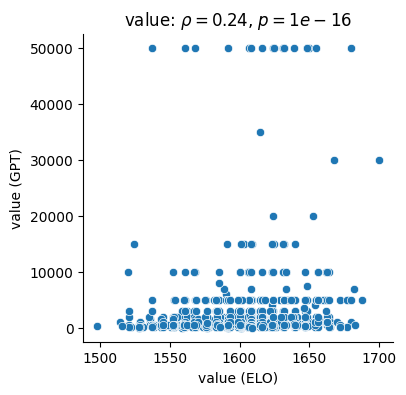

In [13]:
mask = (source['value']>0) & (source['value']<100000)
vcorr = stats.spearmanr(source[mask][['Value', 'value']])
plt.figure(figsize=(4,4))
sns.scatterplot(source[mask], x='Value', y='value')
sns.despine()
plt.xlabel(f'value (ELO)')
plt.ylabel(f'value (GPT)')
plt.title(f'value: $\\rho = {vcorr.statistic:.2g}$, $p = {vcorr.pvalue:.2g}$')

In [18]:
print(source[(source['Question']=='ボールペン')*(source['Answer']=='冷蔵庫')]['raw'].item())

The idea is to use a ballpoint pen ("ボールペン") as a refrigerator ("冷蔵庫"). 

In terms of novelty, this idea is quite unique. Ballpoint pens are typically used for writing or drawing, and the concept of using one as a refrigerator is certainly out of the ordinary. Other unconventional uses for a ballpoint pen might include using it as a makeshift hairpin, a tool for pressing small buttons, or a simple toy. Compared to these, the idea of using a ballpoint pen as a refrigerator is significantly more novel.

However, the feasibility of this idea is extremely low. A ballpoint pen is a small, handheld item that lacks the necessary components to function as a refrigerator. It does not have the capacity to store items, nor does it have a cooling system. Implementing this idea would require a complete redesign of the ballpoint pen, essentially turning it into a different product altogether.

In terms of value, a typical refrigerator in Japan can range from 30,000 to 300,000 JPY, depending on the s